In [1]:
import pandas as pd

In [2]:
#import table containing data
loan=pd.read_csv("loan approval.csv")
loan

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


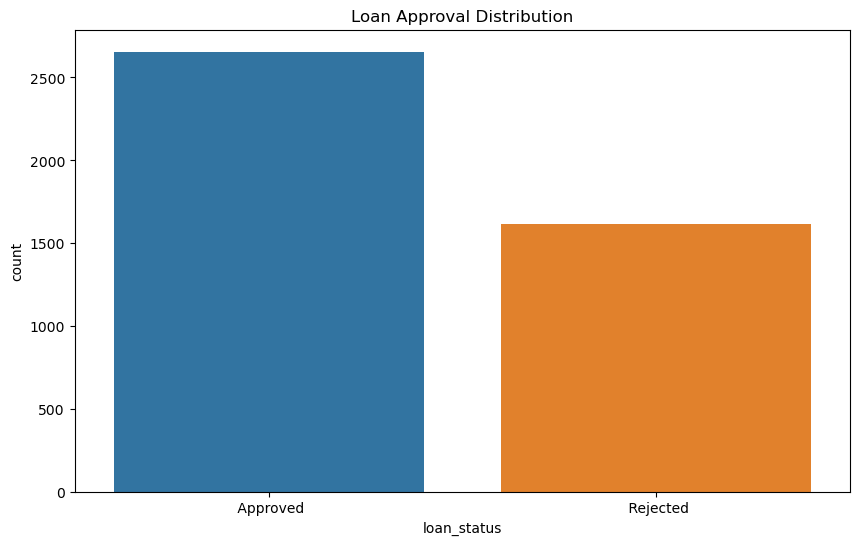

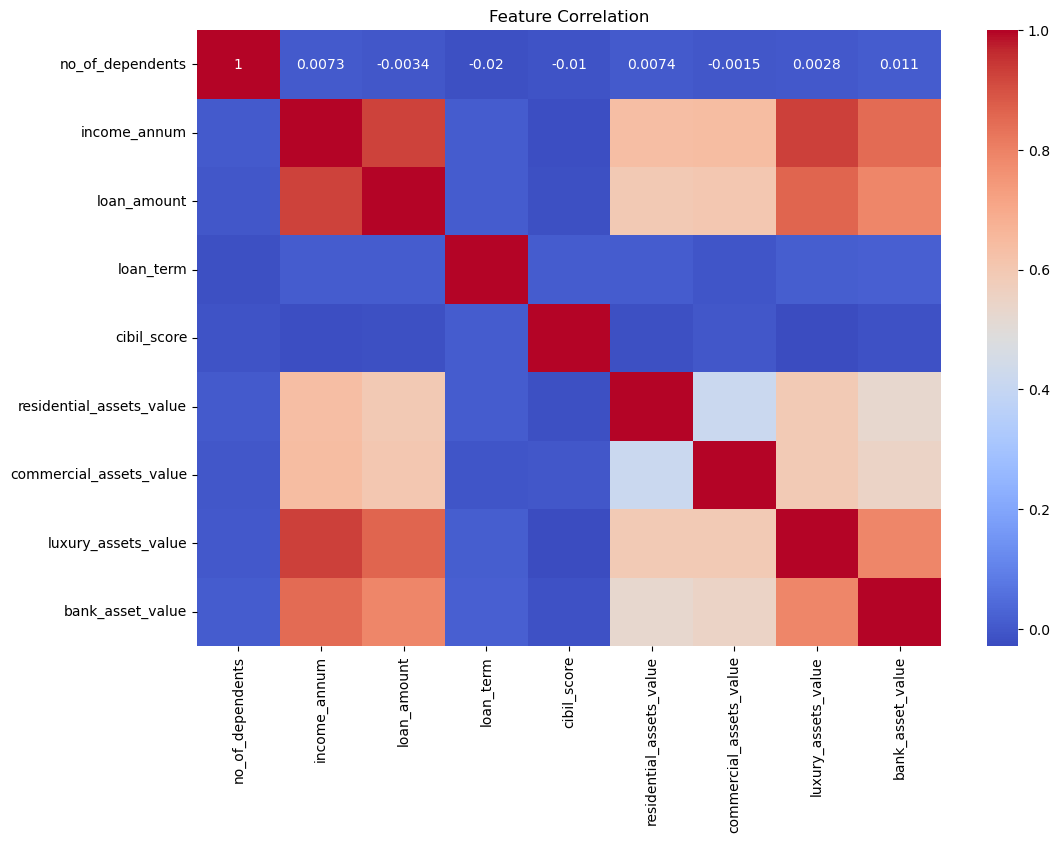

In [13]:
# Check for missing values
print(loan.isnull().sum())

# Handle negative asset value (e.g., row 59)
loan['residential_assets_value'] = loan['residential_assets_value'].abs()

# Drop irrelevant columns
loan = loan.drop('loan_id', axis=1)

# EDA: Plot distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='loan_status', data=loan)
plt.title('Loan Approval Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(loan.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [ ]:
print(loan.columns.tolist())

In [11]:
# Strip whitespace from column names
loan.columns = loan.columns.str.strip()
loan.columns = loan.columns.str.replace(' ', '')  # Remove internal spaces if any

In [ ]:
print(loan.columns.tolist())

In [ ]:
# Replace:
loan['residential_assets_value'] = loan['residential_assets_value'].abs()

# With:
loan['residential_assets_value'] = loan['residential_assets_value'].abs()

In [ ]:
# Fix column names first
loan.columns = loan.columns.str.strip()
loan.columns = loan.columns.str.replace(' ', '_')  # Optional: Standardize naming

# Handle negative values
loan['residential_assets_value'] = loan['residential_assets_value'].abs()

# Feature Engineering

In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
loan['education'] = le.fit_transform(loan['education'])
loan['self_employed'] = le.fit_transform(loan['self_employed'])
loan['loan_status'] = le.fit_transform(loan['loan_status'])

# Split features and target
X = loan.drop('loan_status', axis=1)
y = loan['loan_status']

# Model Training

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

# Save model

In [ ]:
import os

# Create 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

In [ ]:
import os
import joblib

# 1. Create directory if missing
os.makedirs('models', exist_ok=True)  # <── Critical!

# 2. After model training, save artifacts
joblib.dump(model, 'models/trained_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

print("Files saved:", os.listdir('models'))  # Verify files exist

In [ ]:
import os

print("Current directory:", os.getcwd())
print("Models directory contents:", os.listdir('models'))

# Deployment of model

In [ ]:
# src/app.py
import streamlit as st
import joblib
import pandas as pd

# Load model and scaler
model = joblib.load('models/trained_model.pkl')
scaler = joblib.load('models/scaler.pkl')

st.title('Loan Approval Predictor')

# Input fields
no_of_dependents = st.number_input('Number of Dependents', min_value=0)
education = st.selectbox('Education', ['Graduate', 'Not Graduate'])
self_employed = st.selectbox('Self Employed', ['Yes', 'No'])
income_annum = st.number_input('Annual Income', min_value=0)
loan_amount = st.number_input('Loan Amount', min_value=0)
loan_term = st.number_input('Loan Term (months)', min_value=0)
cibil_score = st.number_input('CIBIL Score', min_value=300, max_value=900)
residential_assets = st.number_input('Residential Assets Value', min_value=0)
commercial_assets = st.number_input('Commercial Assets Value', min_value=0)
luxury_assets = st.number_input('Luxury Assets Value', min_value=0)
bank_asset = st.number_input('Bank Asset Value', min_value=0)

# Preprocess input
if st.button('Predict'):
    input_data = pd.DataFrame([[no_of_dependents, education, self_employed, income_annum,
                               loan_amount, loan_term, cibil_score, residential_assets,
                               commercial_assets, luxury_assets, bank_asset]],
                               columns=X.columns)
    
    # Encode categoricals
    input_data['education'] = input_data['education'].map({'Graduate':1, 'Not Graduate':0})
    input_data['self_employed'] = input_data['self_employed'].map({'Yes':1, 'No':0})
    
    # Scale
    scaled_input = scaler.transform(input_data)
    
    # Predict
    prediction = model.predict(scaled_input)[0]
    result = 'Approved' if prediction == 1 else 'Rejected'
    st.success(f'Loan Status: {result}')

In [ ]:
# Use the full relative path to the model files
model = joblib.load('models/trained_model.pkl')
scaler = joblib.load('models/scaler.pkl')